In [1]:
from src.bgc_providers.ohio_bgc_provider import OhioBgcProvider


In [2]:
provider = OhioBgcProvider()

In [3]:
stream = provider.simulate_glucose_stream()

In [4]:
for i in range(10):
    print(next(stream))

2021-06-14 13:00:15.867 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:32 - {'ts': '07-12-2021 01:17:00', 'value': '101'}
2021-06-14 13:00:15.875 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:32 - {'ts': '07-12-2021 01:22:00', 'value': '98'}
2021-06-14 13:00:15.875 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:32 - {'ts': '07-12-2021 01:27:00', 'value': '104'}
2021-06-14 13:00:15.879 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:32 - {'ts': '07-12-2021 01:32:00', 'value': '112'}
2021-06-14 13:00:15.883 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:32 - {'ts': '07-12-2021 01:37:00', 'value': '120'}
2021-06-14 13:00:15.887 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:32 - {'ts': '07-12-2021 01:42:00', 'value': '127'}
2021-06-14 13:00:15.887 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:32 - {'ts': '07-

{'time': 1638839820.0, 'value': 101.0, 'patient': '559'}
{'time': 1638840120.0, 'value': 98.0, 'patient': '559'}
{'time': 1638840420.0, 'value': 104.0, 'patient': '559'}
{'time': 1638840720.0, 'value': 112.0, 'patient': '559'}
{'time': 1638841020.0, 'value': 120.0, 'patient': '559'}
{'time': 1638841320.0, 'value': 127.0, 'patient': '559'}
{'time': 1638841620.0, 'value': 135.0, 'patient': '559'}
{'time': 1638841920.0, 'value': 142.0, 'patient': '559'}
{'time': 1638842220.0, 'value': 140.0, 'patient': '559'}
{'time': 1638842520.0, 'value': 145.0, 'patient': '559'}


In [5]:
data = provider.get_glycose_levels()
type(data)

list

In [6]:
data[3].attrib

{'ts': '07-12-2021 01:32:00', 'value': '112'}

In [7]:
len(data)

10796

In [8]:
from sandbox import *

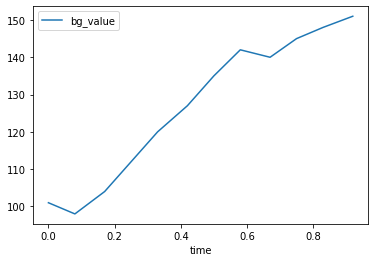

In [9]:
provider = OhioBgcProvider()
df2 = provider.tsfresh_dataframe(trunc=12)

In [10]:
df2

,time,bg_value,id
0,0.00,101,a
1,0.08,98,a
2,0.17,104,a
3,0.25,112,a
4,0.33,120,a
5,0.42,127,a
6,0.50,135,a
7,0.58,142,a
8,0.67,140,a
9,0.75,145,a


In [11]:
from src.featurizers.tsfresh import TsfreshFeaturizer

In [12]:
ts = TsfreshFeaturizer(df2,10,1)

In [13]:
# ts.calculate_master_features()

In [14]:
#ts.create_feature_dataframe()

In [15]:
#ts.create_target_array()

In [16]:
ts.create_labeled_dataframe()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:12<00:00,  6.05s/it]


,bg_value__sum_values,bg_value__median,bg_value__mean,bg_value__length,bg_value__standard_deviation,bg_value__variance,bg_value__root_mean_square,bg_value__maximum,bg_value__minimum,start,end,start_time,end_time,label
0,1224.0,123.5,122.4,10.0,17.001176,289.04,123.575078,145.0,98.0,0,9,0.00,0.75,148
1,1271.0,131.0,127.1,10.0,16.931923,286.69,128.222853,148.0,98.0,1,10,0.08,0.83,151
